In [55]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
#loading data and getting first 7 rows
fifa11 = pd.read_csv("FullData.csv")
fifa11.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [86]:
help(head)

NameError: name 'head' is not defined

In [57]:
#delete the national kit column as we don't need it,
del fifa11["National_Kit"]
fifa11.head()

,Name,Nationality,National_Position,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,...,16,14,11,47,11,91,89,95,90,89


''

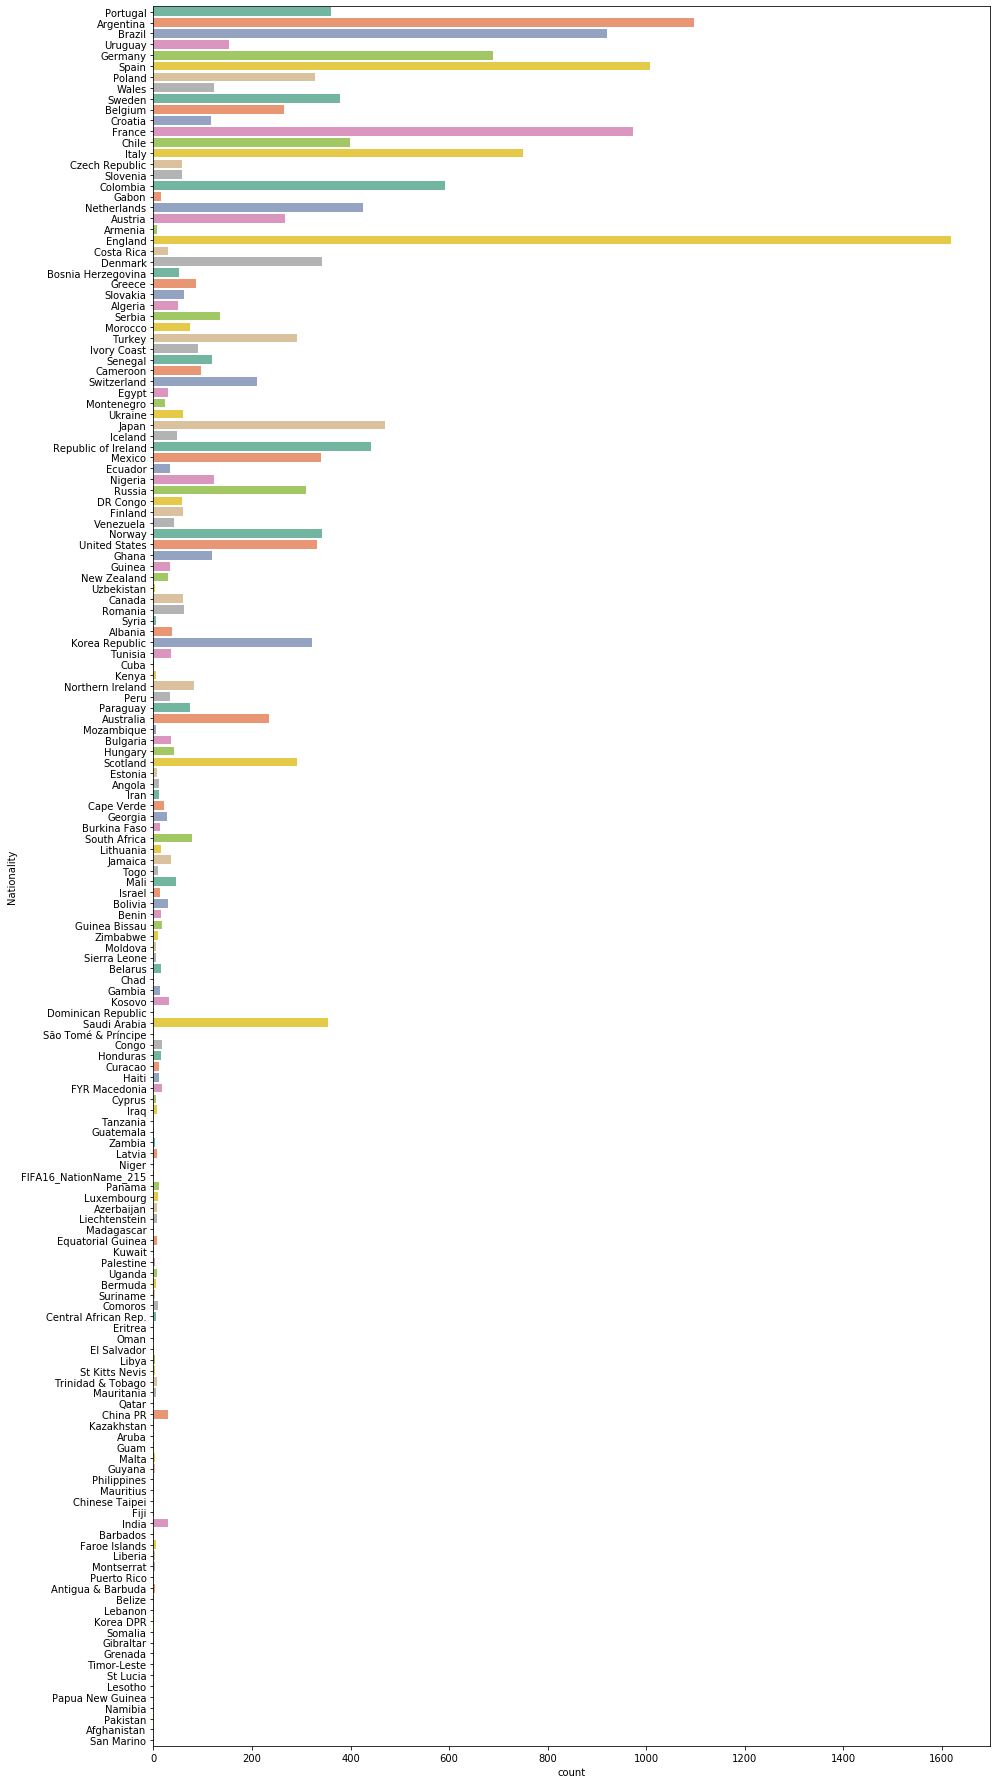

In [58]:
plt.figure(figsize = (15,32))
#plot all the nations on y-axis and player's count on x-axis
sns.countplot(y=fifa11.Nationality, palette="Set2")
;

''

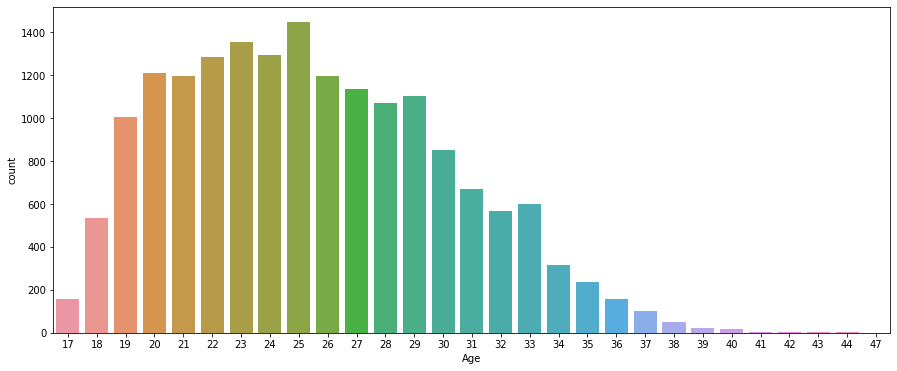

In [59]:
#number of players according to thier age
plt.figure(figsize=(15,6))
sns.countplot(x="Age",data=fifa11)
;

# Finding the best Goalkeeper
Shot Stopper: A goalkeeper who is strong in stopping shots taken by oponents.
Sweepr : A goalkeeper who is strong in playing with his feet and making passes.

In [61]:
#Assigning weights to different skills
a=0.5
b=1
c=2
d=3
#Goalkeeping characteristics
fifa11["GK_Shot_Stopper"] = (b*fifa11.Reactions + b*fifa11.Composure + a*fifa11.Speed + a*fifa11.Strength + c*fifa11.Jumping +
                             b*fifa11.GK_Positioning + c*fifa11.GK_Diving + d*fifa11.GK_Reflexes + b*fifa11.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
fifa11["GK_Sweeper"] = (b*fifa11.Reactions + b*fifa11.Composure + b*fifa11.Speed + a*fifa11.Short_Pass + a*fifa11.Long_Pass + 
                        b*fifa11.Jumping + b*fifa11.GK_Positioning + b*fifa11.GK_Diving + d*fifa11.GK_Reflexes + 
                        b*fifa11.GK_Handling + d*fifa11.GK_Kicking + c*fifa11.Vision)/(2*a+4*b+3*c+2*d)

Text(0, 0.5, 'Shot Stopping Score')

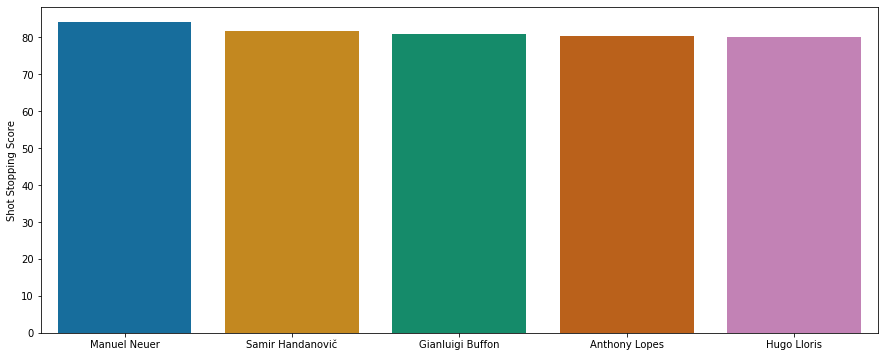

In [62]:
#Based on the above parameters predicting thr best goalkeeper
plt.figure(figsize=(15,6))

sd=fifa11.sort_values("GK_Shot_Stopper",ascending=False)[:5]
x1=np.array(list(sd["Name"]))
y1=np.array(list(sd["GK_Shot_Stopper"]))
sns.barplot(x1,y1, palette="colorblind")
plt.ylabel("Shot Stopping Score")

Text(0, 0.5, 'Sweeping Score')

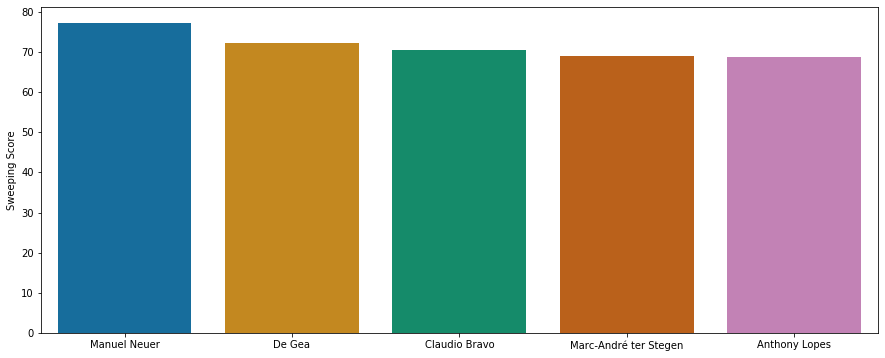

In [63]:
plt.figure(figsize=(15,6))
sd=fifa11.sort_values("GK_Sweeper",ascending=False)[:5]
x2=np.array(list(sd["Name"]))
y2=np.array(list(sd["GK_Sweeper"]))
sns.barplot(x2,y2,palette="colorblind")
plt.ylabel("Sweeping Score")

In [64]:
fifa11["df_centre_backs"] = (d*fifa11.Reactions + c*fifa11.Interceptions + d*fifa11.Sliding_Tackle + d*fifa11.Standing_Tackle 
                             + b*fifa11.Vision + b*fifa11.Composure + b*fifa11.Crossing + a*fifa11.Short_Pass + b*fifa11.Long_Pass
                             + c*fifa11.Acceleration + b*fifa11.Speed + d*fifa11.Stamina + d*fifa11.Jumping + d*fifa11.Heading
                             + b*fifa11.Long_Shots + d*fifa11.Marking + c*fifa11.Aggression)/(6*b +3*c+7*d)
fifa11["df_wb_wing_backs"] = (b*fifa11.Ball_Control + a*fifa11.Dribbling + a*fifa11.Marking + d*fifa11.Sliding_Tackle + 
                              d*fifa11.Standing_Tackle + a*fifa11.Attacking_Position + c*fifa11.Vision + c*fifa11.Crossing + 
                              b*fifa11.Short_Pass + c*fifa11.Long_Pass + d*fifa11.Acceleration + d*fifa11.Speed + 
                              c*fifa11.Stamina + a*fifa11.Finishing)/(4*+2*b+4*c+4*d)

Text(0, 0.5, 'LCB Score')

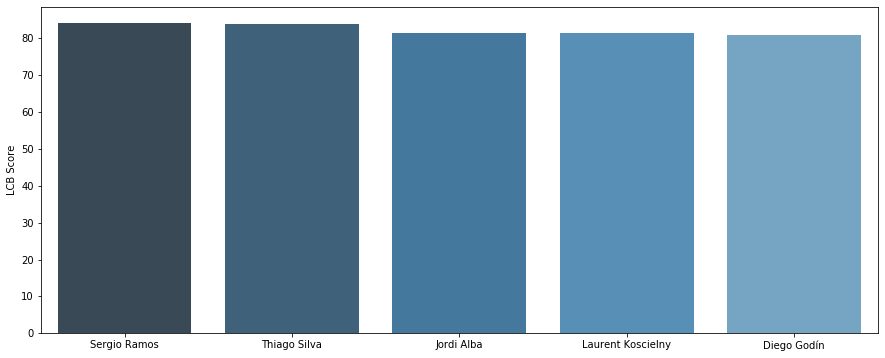

In [65]:
plt.figure(figsize=(15,6))
sd = fifa11[(fifa11["Club_Position"] == "LCB")].sort_values("df_centre_backs", ascending=False)[:5]
x2 = np.array(list(sd["Name"]))
y2 = np.array(list(sd["df_centre_backs"]))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")

Text(0, 0.5, 'LCB Score')

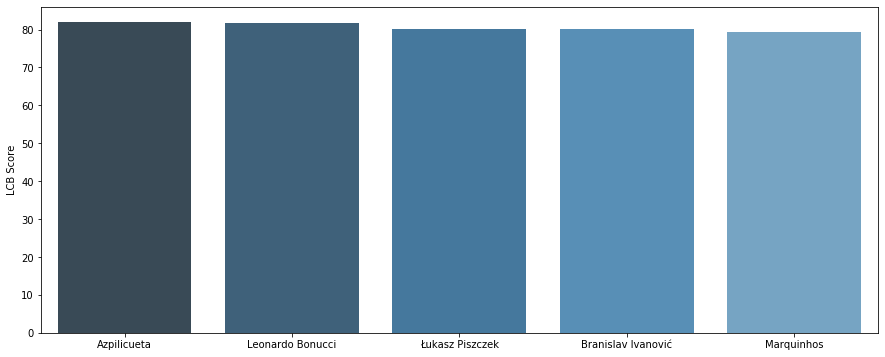

In [66]:
plt.figure(figsize=(15,6))
sd = fifa11[(fifa11["Club_Position"] == "RCB")].sort_values("df_centre_backs",ascending=False)[:5]
x2 = np.array(list(sd["Name"]))
y2 = np.array(list(sd["df_centre_backs"]))
sns.barplot(x2,y2,palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")

Text(0, 0.5, 'Left Back Score')

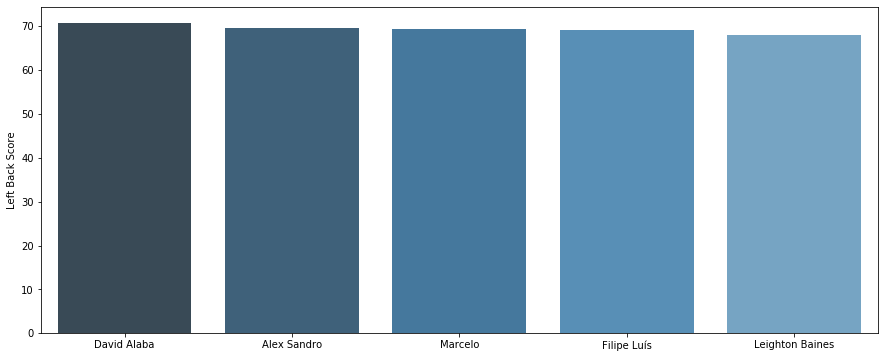

In [69]:
plt.figure(figsize=(15,6))
 
sd = fifa11[(fifa11['Club_Position'] == 'LWB') | (fifa11['Club_Position'] == 'LB')].sort_values('df_wb_wing_backs', ascending=False)[:5]
x4 = np.array(list(sd['Name']))
y4 = np.array(list(sd['df_wb_wing_backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")

Text(0, 0.5, 'Right Back Score')

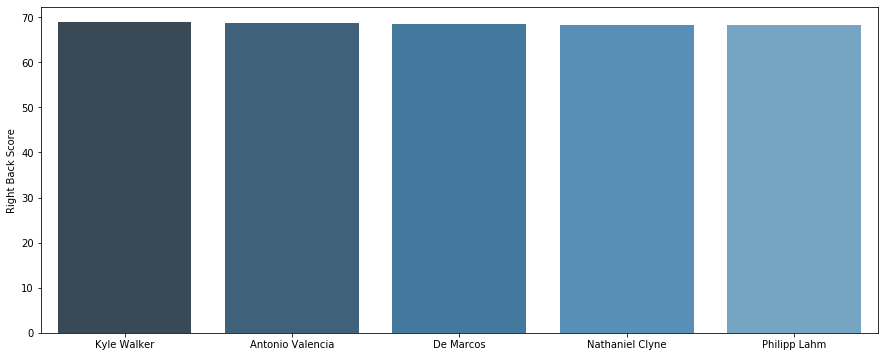

In [70]:
plt.figure(figsize=(15,6))
sd = fifa11[(fifa11['Club_Position'] == 'RWB') | (fifa11['Club_Position'] == 'RB')].sort_values('df_wb_wing_backs', ascending=False)[:5]
x5 = np.array(list(sd['Name']))
y5 = np.array(list(sd['df_wb_wing_backs']))
sns.barplot(x5, y5, palette=sns.color_palette("Blues_d"))
plt.ylabel("Right Back Score")

#Playmaker: A playmaker is someone who will move the ball to the attacking 3rd from defence or midfield.
#Beast:A beast is a typical box-to-box player with loads of energy and who can boss the midfield.
#Controller:A controller is the person who is orchestrating your midfield engine by either sitting back or going forward based on dynamic needs.

In [71]:
fifa11['mf_playmaker'] = (d*fifa11.Ball_Control + d*fifa11.Dribbling + a*fifa11.Marking + d*fifa11.Reactions + d*fifa11.Vision +
                          c*fifa11.Attacking_Position + c*fifa11.Crossing + d*fifa11.Short_Pass + c*fifa11.Long_Pass + 
                          c*fifa11.Curve + b*fifa11.Long_Shots + c*fifa11.Freekick_Accuracy)/(1*a + 1*b + 4*c + 4*d)
fifa11['mf_beast'] = (d*fifa11.Agility + c*fifa11.Balance + b*fifa11.Jumping + c*fifa11.Strength + d*fifa11.Stamina + 
                      a*fifa11.Speed + c*fifa11.Acceleration + d*fifa11.Short_Pass + c*fifa11.Aggression + d*fifa11.Reactions + 
                      b*fifa11.Marking + b*fifa11.Standing_Tackle + b*fifa11.Sliding_Tackle + b*fifa11.Interceptions)/(1*a + 5*b + 4*c + 4*d)
fifa11['mf_controller'] = (b*fifa11.Weak_foot + d*fifa11.Ball_Control + a*fifa11.Dribbling + a*fifa11.Marking + a*fifa11.Reactions + 
                           c*fifa11.Vision + c*fifa11.Composure + d*fifa11.Short_Pass + d*fifa11.Long_Pass)/(2*c + 3*d + 4*a)

Text(0, 0.5, 'PlayMaker Score')

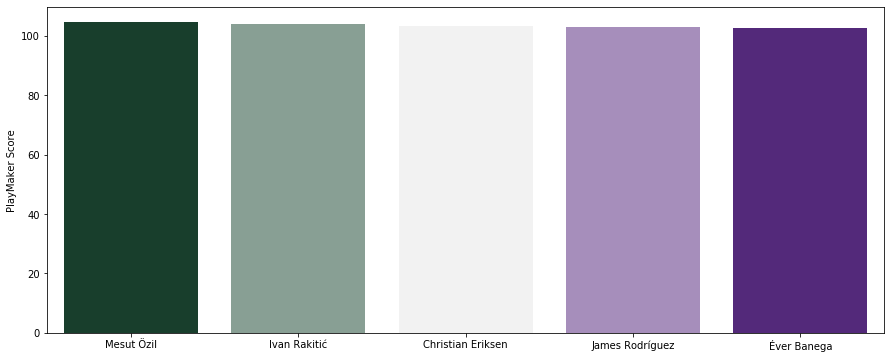

In [72]:
plt.figure(figsize = (15,6))
ss = fifa11[(fifa11["Club_Position"] == "CAM") | (fifa11["Club_Position"] == "LAM") | 
            (fifa11["Club_Position"] =="RAM")].sort_values("mf_playmaker",ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")

Text(0, 0.5, 'Beast Score')

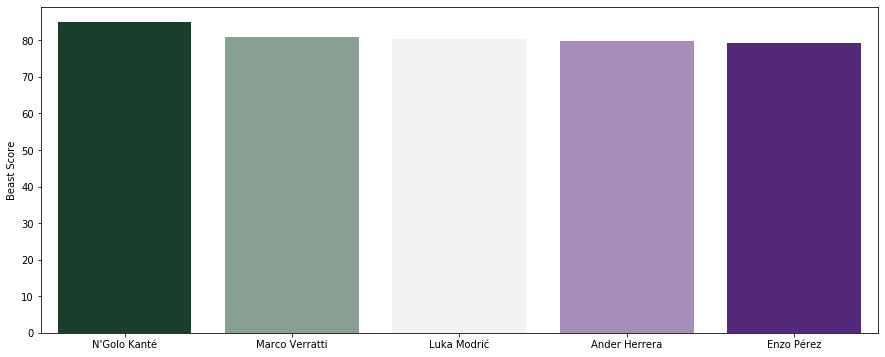

In [73]:
plt.figure(figsize=(15,6))
 
ss = fifa11[(fifa11['Club_Position'] == 'RCM') | (fifa11['Club_Position'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")

Text(0, 0.5, 'Controller Score')

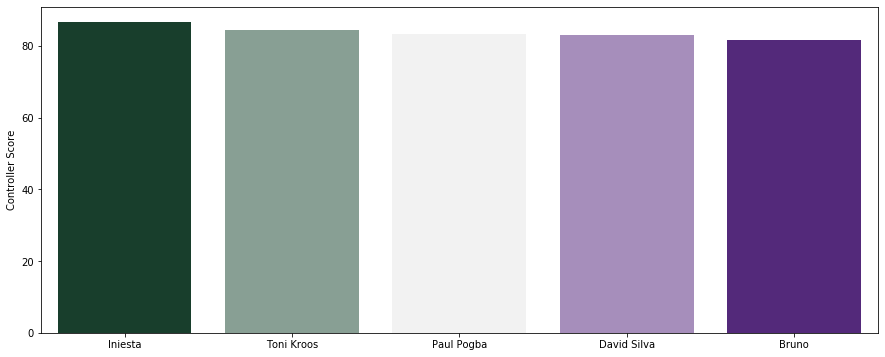

In [74]:
plt.figure(figsize=(15,6))
 
# Generate some sequential data
ss = fifa11[(fifa11['Club_Position'] == 'LCM') | (fifa11['Club_Position'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")

#Attacking Left Wing: He is a player, attacking from the left flank.
#Attacking Right Wing: He is a player, attacking from the right flank.
#Striker: He is a player attacking from the center.

In [75]:
#Attackers
fifa11['att_left_wing'] = (c*fifa11.Weak_foot + c*fifa11.Ball_Control + c*fifa11.Dribbling + c*fifa11.Speed + 
                           d*fifa11.Acceleration + b*fifa11.Vision + c*fifa11.Crossing + b*fifa11.Short_Pass + 
                           b*fifa11.Long_Pass + b*fifa11.Aggression + b*fifa11.Agility + a*fifa11.Curve + c*fifa11.Long_Shots + 
                           b*fifa11.Freekick_Accuracy + d*fifa11.Finishing)/(a + 6*b + 6*c + 2*d)
fifa11['att_right_wing'] = (c*fifa11.Weak_foot + c*fifa11.Ball_Control + c*fifa11.Dribbling + c*fifa11.Speed + d*fifa11.Acceleration + 
                            b*fifa11.Vision + c*fifa11.Crossing + b*fifa11.Short_Pass + b*fifa11.Long_Pass + b*fifa11.Aggression + 
                            b*fifa11.Agility + a*fifa11.Curve + c*fifa11.Long_Shots + b*fifa11.Freekick_Accuracy + 
                            d*fifa11.Finishing)/(a + 6*b + 6*c + 2*d)
fifa11['att_striker'] = (b*fifa11.Weak_foot + b*fifa11.Ball_Control + a*fifa11.Vision + b*fifa11.Aggression + b*fifa11.Agility + 
                         a*fifa11.Curve + a*fifa11.Long_Shots + d*fifa11.Balance + d*fifa11.Finishing + d*fifa11.Heading + 
                         c*fifa11.Jumping + c*fifa11.Dribbling)/(3*a + 4*b + 2*c + 3*d)

Text(0, 0.5, 'Left Wing')

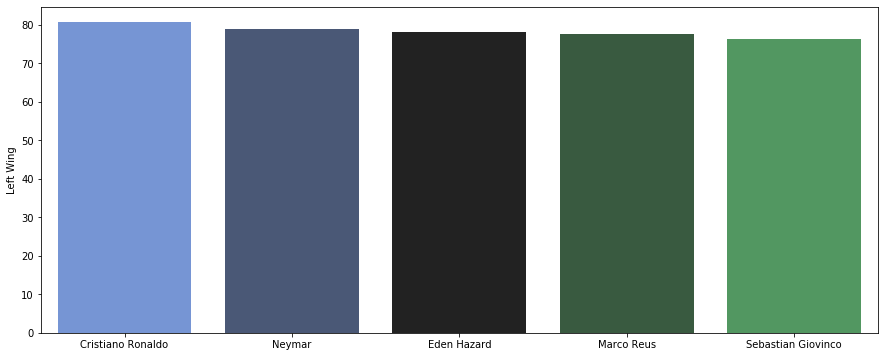

In [76]:
plt.figure(figsize=(15,6))
 
ss = fifa11[(fifa11['Club_Position'] == 'LW') | (fifa11['Club_Position'] == 'LM') | 
            (fifa11['Club_Position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")

Text(0, 0.5, 'Right Wing')

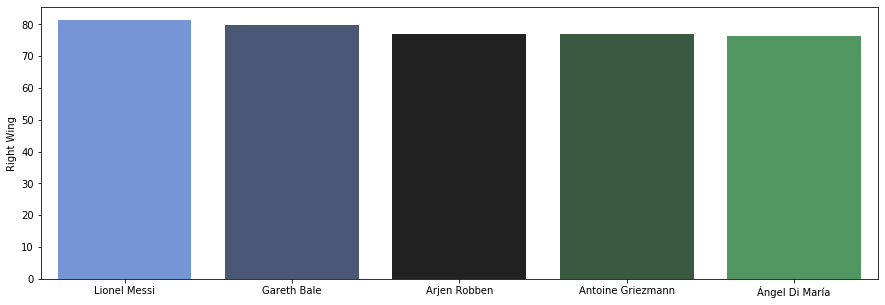

In [83]:
plt.figure(figsize=(15,5))
 
ss = fifa11[(fifa11['Club_Position'] == 'RW') | (fifa11['Club_Position'] == 'RM') |
            (fifa11['Club_Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['att_right_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")

Text(0, 0.5, 'Striker')

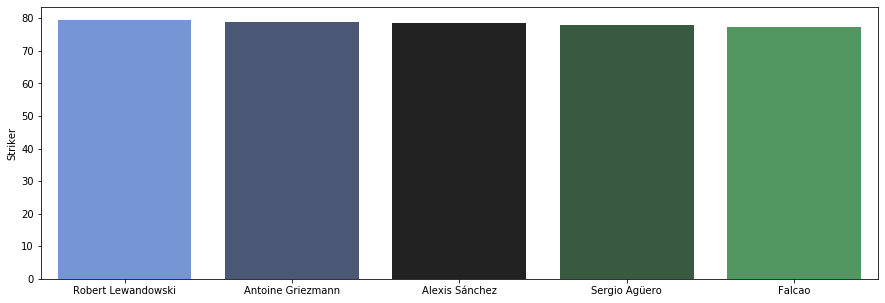

In [82]:
plt.figure(figsize=(15,5))
ss = fifa11[(fifa11['Club_Position'] == 'ST') | (fifa11['Club_Position'] == 'LS') | 
            (fifa11['Club_Position'] == 'RS') | (fifa11['Club_Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")